In [8]:
# Importa os módulos necessários
import random                # Para gerar valores aleatórios
import numpy as np           # Para manipulação de arrays e números aleatórios com distribuição normal

# Função que cria dados artificiais agrupados (clusterizados)
def createClusteredData(N, K):
    random.seed(10)  # Fixa a semente para gerar os mesmos dados toda vez (reprodutibilidade)

    pointsPerCluster = float(N) / K  # Define quantos pontos terão em cada cluster

    X = []  # Lista onde os pontos serão armazenados

    # Para cada um dos K clusters
    for i in range(K):
        # Gera um centro aleatório de renda (income) entre 20 mil e 200 mil
        incomeCentroid = random.uniform(20000.0, 200000.0)

        # Gera um centro aleatório de idade entre 20 e 70 anos
        ageCentroid = random.uniform(20.0, 70.0)

        # Cria pontos em torno desse centro usando distribuição normal
        for j in range(int(pointsPerCluster)):
            # Gera renda com média = incomeCentroid e desvio padrão = 10 mil
            # Gera idade com média = ageCentroid e desvio padrão = 2 anos
            X.append([
                np.random.normal(incomeCentroid, 10000.0),
                np.random.normal(ageCentroid, 2.0)
            ])

    # Converte a lista X em um array NumPy para facilitar manipulação posterior
    X = np.array(X)

    return X  # Retorna os dados gerados (N pontos com 2 dimensões: renda e idade)

[2 2 3 3 3 3 2 2 2 3 2 3 3 2 2 2 3 2 3 2 4 0 4 0 3 0 0 0 4 4 0 4 0 4 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 4 4 4 0 0 4 0 4 4 4 4
 0 4 4 4 4 0 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 0 2]


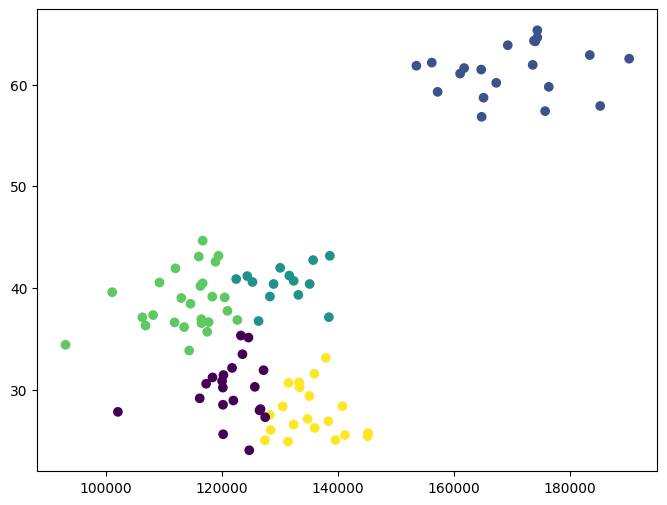

In [12]:
# Importa o algoritmo de clusterização K-Means da biblioteca scikit-learn
from sklearn.cluster import KMeans

# Importa o módulo de visualização para plotar gráficos
import matplotlib.pyplot as plt

# Importa a função scale para padronizar os dados (média 0, desvio padrão 1)
from sklearn.preprocessing import scale

# Gera dados artificiais clusterizados (100 pontos agrupados em 5 grupos)
data = createClusteredData(100, 5)

# Cria um modelo K-Means com 5 clusters (o mesmo número usado na criação dos dados)
model = KMeans(n_clusters=5)

# Padroniza os dados (escala os valores para melhor desempenho do algoritmo) e treina o modelo
model = model.fit(scale(data))

# Exibe os rótulos (labels) atribuídos a cada ponto de dados após o agrupamento
print(model.labels_)

# Plota os dados em um gráfico de dispersão, colorindo cada ponto conforme o cluster identificado
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))  # Cor baseada no cluster
plt.show()  # Mostra o gráfico